<a href="https://colab.research.google.com/github/Ziqi-Li/GEO4162C/blob/fall-24/notebooks/Point_Pattern_Analysis_Crime_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Point Pattern Analysis

In this example, I will demostrate how to perform KDE analysis and Distance functions in Python using a crime dataset in LA Los Angeles.


Specifically,we would need these packages for doing the analysis:
- `seaborn`: this is actually a visualization package; however, they do have KDE function which can be used for 2D spatial data.
- `pointpats`: this is a package for conducting distance based analysis.
- `contextily`: this is to add a basemap (like a google map) to your map.



`pointpats` is not pre-installed in Google Colab, so you need to install them manually by using the `pip` command:

`pip install package` You can also install a specific version version 2.3.0 as `==2.3.0`.



**Note:** You need to re-install packages (by re-running this cell) if you are disconnected from the server.

**New Note:** There have been some recent changes that cause conflicts with packages and google Colab. So a work around is to install the package from my local copy. Simply to run the first line of code to install a version of `pointpats` that is compatible with Colab.




In [ ]:
pip install -q https://github.com/Ziqi-Li/pointpats/archive/v2.3.zip


  Preparing metadata (setup.py) ... done


## Import all the packages needed

In [ ]:
import geopandas
import seaborn

## Data
Read in the crime incident data using `geopandas.read_file()`.

In [ ]:
crime = geopandas.read_file("https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/fall-24/data/LA_crime_locations.geojson")

The above data is too big, for demostration purpose, I randomly sampled 1000 data points.

In [ ]:
crime = crime.sample(1000)

It is always the best practice to check the data first before we move next. For example, you would need to do these things:

- 1. Check the data table to know the attributes in the GeoDataFrame
- 2. Check the geometry, to see whether you can plot them
- 3. Check whether the shapefiles you read in are having the same `crs`

In [ ]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,geometry
9430,210712673,08/24/2021 12:00:00 AM,08/17/2021 12:00:00 AM,1630,7,Wilshire,702,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,Invest Cont,440.0,NaN,NaN,NaN,MELROSE AV,FAIRFAX AV,34.0838,-118.3614,POINT (-118.3614 34.0838)
6790,210810822,06/24/2021 12:00:00 AM,06/24/2021 12:00:00 AM,330,8,West LA,836,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,10500 SANTA MONICA BL,None,34.0548,-118.4276,POINT (-118.4276 34.0548)
9474,211804843,01/16/2021 12:00:00 AM,01/16/2021 12:00:00 AM,2100,18,Southeast,1829,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,101ST ST,JUNIPER,33.9449,-118.2332,POINT (-118.2332 33.9449)
2278,211508090,04/16/2021 12:00:00 AM,04/14/2021 12:00:00 AM,400,15,N Hollywood,1555,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,11000 OTSEGO ST,None,34.1630,-118.3729,POINT (-118.3729 34.163)
6112,212016199,10/25/2021 12:00:00 AM,08/21/2021 12:00:00 AM,1200,20,Olympic,2013,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,100 S OXFORD AV,None,34.0711,-118.3079,POINT (-118.3079 34.0711)


<Axes: >

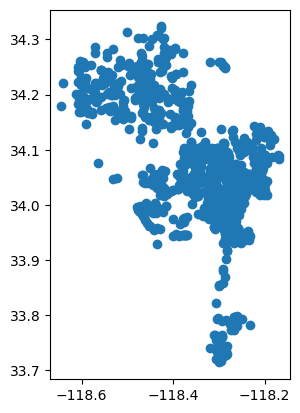

In [ ]:
crime.plot()

In [ ]:
crime.crs #This returns you the crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## KDE
Performing Kernel Density Estimation(KDE)

The function `seaborn.kdeplot()` takes several parameters:
- 1. the GeoDataFrame `crime`
- 2. the x and y coordinates, of which we can extract from the GeoDataFrame as `crime.geometry.x` and `crime.geometry.y`
- 3. the `bw_method` is the bandwidth of the KDE.
- 4. the `fill` parameter indicates whether you want a countour map or a filled color map. Try setting it with `False`.
- 5. the `cmap` parameter indicates the colors you want to use
- 6. the `alpha` parameter indicates the level of transparency.

Basically 4, 5, 6 are styles parameters you could change.

The codes for performing a KDE are:

<Axes: xlabel='None', ylabel='None'>

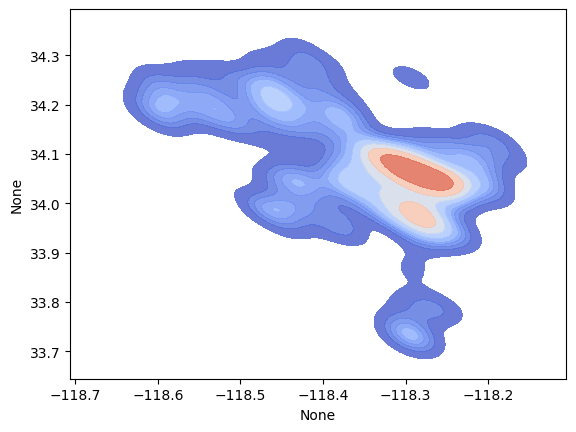

In [ ]:
seaborn.kdeplot(data=crime,
            x=crime.geometry.x,
            y=crime.geometry.y,
            bw_method=0.2,
            fill=True,
            cmap="coolwarm",
            alpha=0.8)

## Adding a basemap

Here I added a small section on using `contextily` package to add a basemap to your plot, this is very useful in most cases when we don't have anoter basemap as the reference/to provide necessary context.

`contextily` is not available in Google Colab, so we need to install it here.

In [ ]:
pip install -q contextily

In [ ]:
import contextily as cx #as is alias, so intead of calling contextily, you will have a shorthand name cx.

import matplotlib.pyplot as plt #same for this.

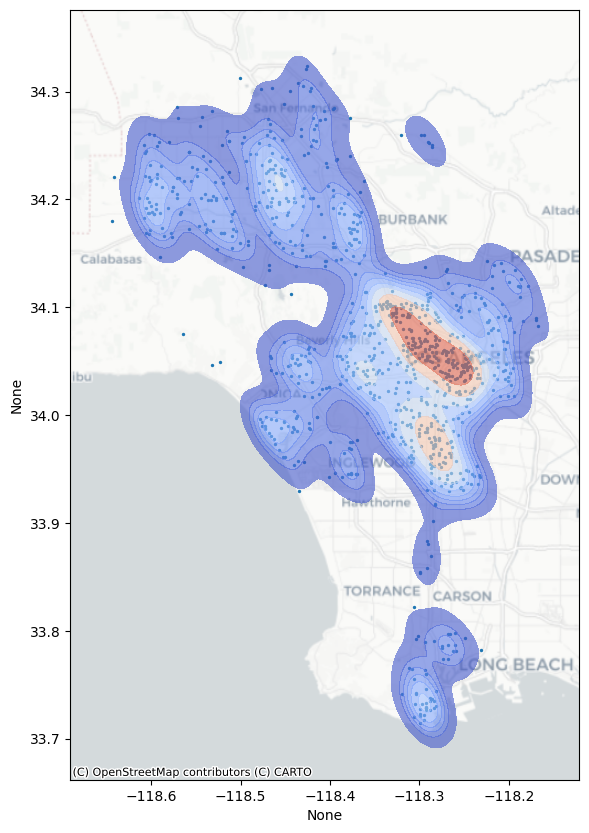

In [ ]:
f, ax = plt.subplots(figsize=(10,10)) #Creata a map with size 10 by 10

crime.plot(ax=ax, markersize = 2)

seaborn.kdeplot(ax=ax,data=crime, x=crime.geometry.x, y=crime.geometry.y, bw_method=0.15, fill=True,
            cmap="coolwarm",alpha=0.6)

#This is the new line of code:
#We need to put a crs into the function.
#The source parameter defines the style of the base map: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
#There are many options available.
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=crime.crs) # we need to put a crs into the function.

## Distance function Analysis

The next section we would be conducting nearest neighbor analysis with distance functions. This is easily done in the awesome `pointpats` package.

First, lets extract the x and y coordinates from the `cases` GeoDataFrame and put them as a 2d array.

There are steps that you are 100% sure what is doing but that is okay. The key part is if you extend this to another data, you would need to replace `crime` the GeoDataFrame with your other GeoDataFrame.

In [ ]:
from pointpats import distance_statistics as stats
from pointpats import PointPattern, PoissonPointProcess
import numpy as np

In [ ]:
x = crime.geometry.x.values
y = crime.geometry.y.values

points = np.array(list(zip(x,y)))

Second, lets create a `PointPattern()` class using the points

In [ ]:
pp = PointPattern(points)

/usr/local/lib/python3.10/dist-packages/pointpats/window.py:15: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  return ps.cg.shapes.Polygon(c)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1408: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = [Ring(vertices)]
/usr/local/lib/python3.10/dist-packages/pointpats/window.py:68: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  super(Window, self).__init__(parts)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1405: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = list(map(Ring, vertices))


In [ ]:
pp

## G, F, J and K distance functions

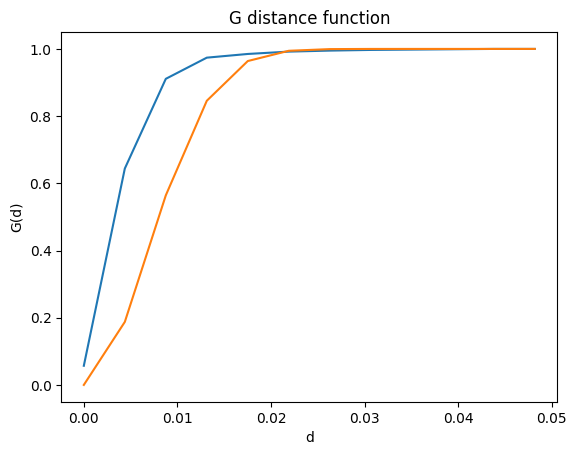

In [ ]:
g_rslt = stats.G(pp)

g_rslt.plot()

The observed G curve (blue) is  **above** the CSR (orange), indicating a **clustered** pattern we obseve in the crime map.

/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1614: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._bounding_box = Rectangle(
/usr/local/lib/python3.10/dist-packages/pointpats/process.py:142: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  pnts = [ps.cg.shapes.Point((x, y)) for x, y in pnts]
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1195: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._bounding_box = Rectangle(min(x), min(y), max(x), max(y))


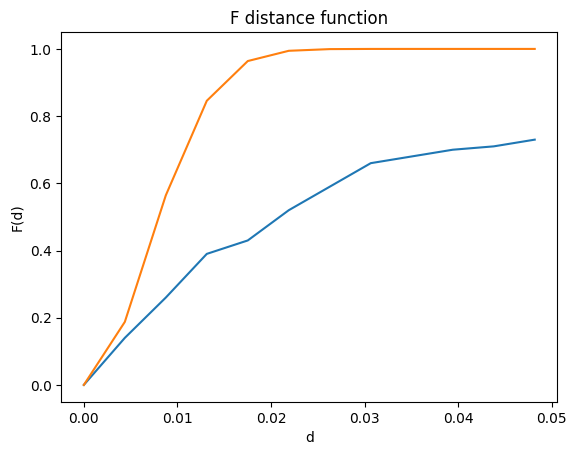

In [ ]:
f_rslt = stats.F(pp)

f_rslt.plot()

The observed F curve (blue) is  **below** the CSR (orange), indicating a **clustered** pattern we obseve in the crime map.

/usr/local/lib/python3.10/dist-packages/pointpats/process.py:142: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  pnts = [ps.cg.shapes.Point((x, y)) for x, y in pnts]
/usr/local/lib/python3.10/dist-packages/pointpats/_deprecated_distance_statistics.py:239: RuntimeWarning: invalid value encountered in divide
  self.ev = self.j / self.j


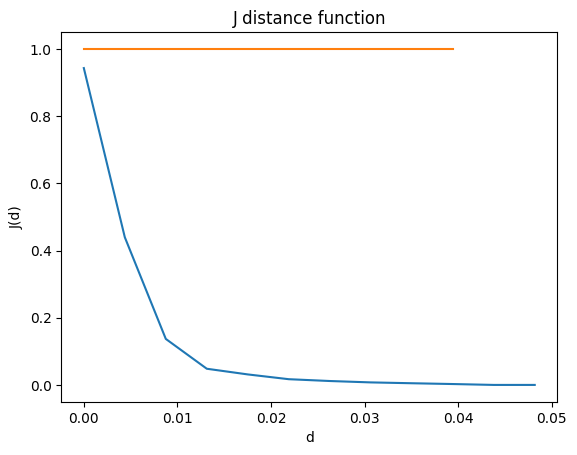

In [ ]:
j_rslt = stats.J(pp)

j_rslt.plot()

The observed J curve (blue) is  **below** the CSR (orange), indicating a **clustered** pattern we obseve in the crime map.

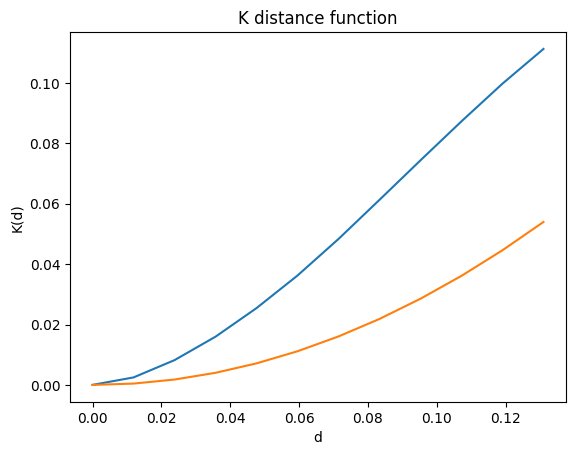

In [ ]:
k_rslt = stats.K(pp)

k_rslt.plot()

The observed K curve (blue) is  **above** the CSR (orange), indicating a **clustered** pattern we obseve in the crime map.